# 분류 성능 평가 지표 
- 정확도(Accuracy)
- 오차 행렬(Confusion Matrix)
- 정밀도(Precision)
- 재현율(Recall)
- F1 스코어
- ROC AUC

# Accuracy(정확도)

In [2]:
import numpy as np
from sklearn.base import BaseEstimator 

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y = None) : 
        pass
    
    # predict() 메서드는 단순히 Sex feature가 1이면 0, 그렇지 않으면 1로 예측
    def predict(self, X) : 
        pred = np.zeros( (X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1 :
                pred[i] = 0
            else :
                pred[i] = 1
                
        return pred

In [3]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df) :
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

# 불필요한 속성 제거
def drop_features(df) : 
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 
def format_features(df)  :
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features : 
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

# 앞에서 설정한 DataPreprocessing 호출
def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size = 0.2, random_state = 0)

# 위에서 생성한 DummyClassifier를 이용하여 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는 : 0.7877


**Dummy Classifier로 예측해도 0.7877이라는 정확도가 나옴**

In [5]:
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator): 
    def fit(self, X, y) :
        pass
    
    # 입력값으로 들어오는 X 데이터셋의 크기만큼 모두 0으로 반환
    def predict(selm, X) : 
        return np.zeros((len(X),1), dtype = bool)
    
# 사이킷런의 내장 데이터셋인 load_digits()를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print('### digits.data,shape :', digits.data.shape)
print(digits.target)
print('### digits.target.shape :', digits.target.shape)
    

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data,shape : (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape : (1797,)


In [6]:
# digits 번호가 7번이면 True이고 astype(int)을 통해 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

In [7]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# DummyClassifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 :{:.3f}'.format(accuracy_score(fakepred, y_test)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 :0.900


# Confusion Matrix

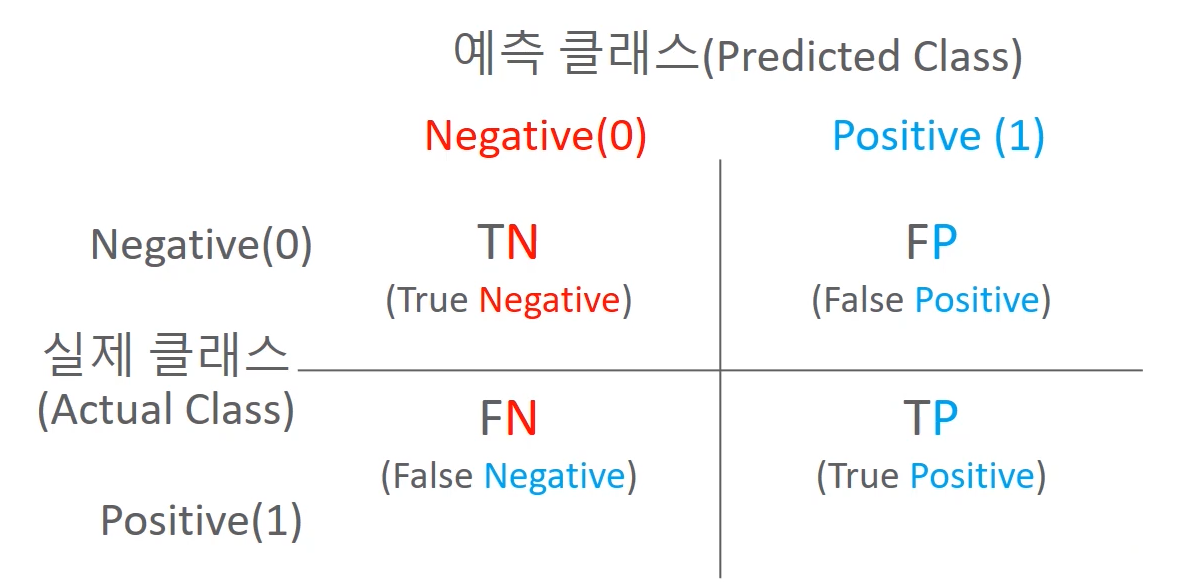

In [8]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix 출력
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

**정확도 지표 문제점 인지**
- TP는 0이므로 Positive로 예측한 것이 한 건도 성공하지 않았음
- FP가 0이므로 Positive로 예측 자체를 수행하지 않았음을 알 수 있음

## 정밀도(Precision)와 재현율(Recall)
**MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정**

정밀도 = $\dfrac{TP}{(FP+TP)}$  

Positive로 예측한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율

재현율 = $\dfrac{TP}{(FN+TP)}$

실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('정밀도 :', precision_score(y_test, fakepred))
print('재현율 :', recall_score(y_test, fakepred))

정밀도 : 0.0
재현율 : 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**오차 행렬, 정확도, 정밀도, 재현율을 한 번에 계산하는 함수 생성**

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred) : 
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬\n', confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

In [11]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1 )
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size = 0.20, random_state = 11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
 [[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**업무에 따른 재현율과 정밀도와 상대적 중요도**
 
재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive인 데이터를 Negative로 잘못 판단했을 때 업무상 큰 영향이 발생하는 경우
 - ex. 암 진단, 금융사기 판별
 
정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative인 데이터를 Positive로 잘못 판단했을 때 업무상 큰 영향이 발생하는 경우
 - ex. 스팸 메일

# Precision/Recall Trade-off

In [12]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞의 3개만 샘플로 추출 \n', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 concatenate해서 예측 확률과 결과값을 한 눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print('두 개의 class중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 shape : (179, 2)
pred_proba array에서 앞의 3개만 샘플로 추출 
 [[0.4616653  0.5383347 ]
 [0.87862763 0.12137237]
 [0.87727002 0.12272998]]
두 개의 class중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.4616653  0.5383347  1.        ]
 [0.87862763 0.12137237 0.        ]
 [0.87727002 0.12272998 0.        ]]


**Binarizer 활용**

In [13]:
from sklearn.preprocessing import Binarizer 

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


**분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 반환**

In [14]:
from sklearn.preprocessing import Binarizer 

# Binarizer의 threshold 설정값(분류 결정 임계값)
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 column, 즉 Positive 클래스 column 하나만 추출하여 Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

custom_predict = Binarizer(threshold = custom_threshold).fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
 [[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869


**Binarizer의 threshold 설정값을 0.4로 설정, 분류 결정 임계값을 0.5에서 0.4로 낮춤**

In [16]:
from sklearn.preprocessing import Binarizer 

# Binarizer의 threshold 설정값(분류 결정 임계값)
custom_threshold = 0.4

# predict_proba() 반환값의 두 번째 column, 즉 Positive 클래스 column 하나만 추출하여 Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

custom_predict = Binarizer(threshold = custom_threshold).fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
 [[99 19]
 [10 51]]
정확도 : 0.8380, 정밀도 : 0.7286, 재현율 : 0.8361


**여러 개의 분류 결정 임계값을 변경하면서 Binarizer를 이용하여 예측값 반환**

In [22]:
# 테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds = [0.40,0.45,0.50,0.55,0.65]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds) : 
    for custom_threshold in thresholds : 
        custom_predict = Binarizer(threshold = custom_threshold).fit_transform(pred_proba_c1)
        print('\n임계값 :{0:.4f}'.format(custom_threshold))
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임계값 :0.4000
오차 행렬
 [[99 19]
 [10 51]]
정확도 : 0.8380, 정밀도 : 0.7286, 재현율 : 0.8361

임계값 :0.4500
오차 행렬
 [[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033

임계값 :0.5000
오차 행렬
 [[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869

임계값 :0.5500
오차 행렬
 [[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541

임계값 :0.6500
오차 행렬
 [[115   3]
 [ 22  39]]
정확도 : 0.8603, 정밀도 : 0.9286, 재현율 : 0.6393


**precision_recall_curve()를 이용하여 임계값에 따른 정밀도-재현율 값 추출**

In [23]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape :', thresholds.shape)
print('반환된 precisions 배열의 shape :', precisions.shape)
print('반환된 recalls 배열의 shape :', recalls.shape)

print('thresholds 5 sample :', thresholds[:5])
print('precisions 5 sample :', precisions[:5])
print('recalls 5 sample :', recalls[:5])

# 반횐된 임계값 배열 row가 147건이므로 샘플로 10건만 추출하되, 임계값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개 :', thr_index)
print('샘플용 10개의 임계값 :', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도 :', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율 :', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 shape : (143,)
반환된 precisions 배열의 shape : (144,)
반환된 recalls 배열의 shape : (144,)
thresholds 5 sample : [0.10393302 0.10393523 0.10395998 0.10735757 0.10891579]
precisions 5 sample : [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample : [1.         0.98360656 0.98360656 0.98360656 0.96721311]
샘플 추출을 위한 임계값 배열의 index 10개 : [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값 : [0.1  0.12 0.14 0.19 0.28 0.4  0.57 0.67 0.82 0.95]
샘플 임계값별 정밀도 : [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율 : [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


**임계값의 변경에 따른 정밀도-재현율 변화 곡선 그림**

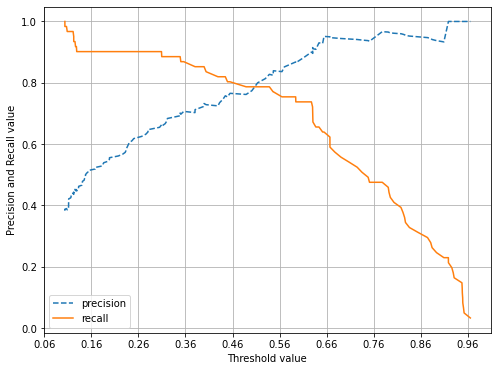

In [44]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
%matplotlib inline 

def precision_recall_curve_plot(y_test, pred_proba_c1) : 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold 값, Y축을 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 재현율은 실선으로 표시
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], linestyle = '-', label = 'recall')
    
    # threshold 값 X 축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value') ; plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, pred_proba[:,1])

# F1 score

F1 스코어는 정밀도와 재현율을 결합한 지표

F1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우지지 않을 때 상대적으로 높은 값을 가진다

사이킷런은 f1 score를 위해 `f1_score()` 제공

$
F_1 Score = \dfrac{2}{\dfrac{1}{recall}+\dfrac{1}{precision}} = 2*\dfrac{precision*recall}{precision+recall}
$

## ROC 곡선과 AUC

ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표

**ROC 곡선**은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선

FPR을 x축으로, TPR을 y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타난다

분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정
- ROC곡선 밑의 면적을 구하는 것으로 1에 가까울수록 좋은 수치

**TPR**은 재현율을 나타낸다

$ TPR = \dfrac{TP}{FN+TP}$

**FPR**은 실제 Negative를 잘못 예측한 비율

$FPR = \dfrac{FP}{FP+TN}$

In [68]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 score : {0:.4f}'.format(f1))

F1 score : 0.7805


In [70]:
def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # f1 score 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬 \n',confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.40,0.45,0.50,0.55,0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임계값 :0.4000
오차 행렬 
 [[99 19]
 [10 51]]
정확도 : 0.8380, 정밀도 : 0.7286, 재현율 : 0.8361, F1 : 0.7786

임계값 :0.4500
오차 행렬 
 [[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033, F1 : 0.7840

임계값 :0.5000
오차 행렬 
 [[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, F1 : 0.7805

임계값 :0.5500
오차 행렬 
 [[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541, F1 : 0.7931

임계값 :0.6000
오차 행렬 
 [[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377, F1 : 0.8036


# ROC Curve와 AUC

In [71]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index 10개 :', thr_index)
print('샘플용 10개의 임계값 :', thresholds[thr_index])

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR :', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR :', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index 10개 : [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임계값 : [1.96517501 0.75098851 0.63080343 0.594202   0.48885528 0.39960097
 0.30965482 0.14772885 0.12273586 0.11202006 0.10393523]
샘플 임계값별 FPR : [0.    0.017 0.034 0.059 0.127 0.161 0.237 0.483 0.61  0.703 0.814]
샘플 임계값별 TPR : [0.    0.475 0.672 0.754 0.787 0.852 0.885 0.902 0.934 0.967 0.984]


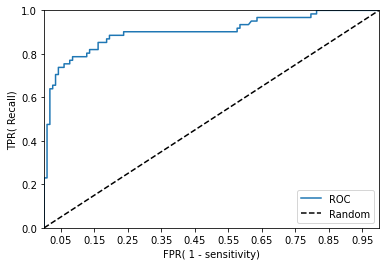

In [75]:
def roc_curve_plot(y_test, pred_proba_c1) : 
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label = 'ROC')
    plt.plot([0,1], [0,1], 'k--', label = 'Random')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1) ; plt.ylim(0,1)
    plt.xlabel('FPR( 1 - sensitivity)')
    plt.ylabel('TPR( Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [78]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.9024


In [91]:
def get_clf_eval(y_test, pred = None, pred_proba = None) : 
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬\n', confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format\
         (accuracy, precision, recall, f1, roc_auc))

In [92]:
get_clf_eval(y_test,lr_clf.predict(X_test),lr_clf.predict_proba(X_test)[:,1])

오차 행렬
 [[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, F1 : 0.7805, AUC : 0.9024
